In [37]:
#importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading the Dataset

In [9]:
df=pd.read_csv('/kaggle/input/fish-market/Fish.csv')
#showing the dataset
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [10]:
#checking for null values
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [11]:
y=df['Species']
x=df.drop('Species',axis=1)

# Scaling the Dataset

In [14]:
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [15]:
x

,Weight,Length1,Length2,Length3,Height,Width
0,-0.438072,-0.305789,-0.282303,-0.106020,0.596579,-0.236529
1,-0.303562,-0.225507,-0.198054,-0.002337,0.821261,-0.066579
2,-0.163448,-0.235542,-0.179332,-0.010977,0.797341,0.165793
3,-0.098995,0.005302,0.054694,0.196390,0.879771,0.022621
4,0.088759,0.025372,0.054694,0.239592,0.812835,0.426371
...,...,...,...,...,...,...
154,-1.082039,-1.479903,-1.517960,-1.540309,-1.610359,-1.799403
155,-1.078676,-1.459833,-1.499238,-1.531669,-1.530878,-1.873547
156,-1.082039,-1.419692,-1.443072,-1.505748,-1.566687,-1.881402
157,-1.061022,-1.309305,-1.321378,-1.384784,-1.427243,-1.398568


# Labeling the Target Column

In [19]:
label=LabelEncoder()
y=label.fit_transform(y)

# Mapping

In [24]:
y_mapping={index:label for index,label in enumerate(label.classes_)}

In [25]:
y_mapping

{0: 'Bream',
 1: 'Parkki',
 2: 'Perch',
 3: 'Pike',
 4: 'Roach',
 5: 'Smelt',
 6: 'Whitefish'}

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5])

# Train Test Split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

# Checking the Shape of the Dataset

In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(111, 6)
(48, 6)
(111,)
(48,)


# Training the Logistic Model

In [30]:
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
print("Logistic Model's Accuracy:",logistic_model.score(x_test,y_test))

Logistic Model's Accuracy: 0.75


# Training Using Tensorflow Neural Network

In [31]:
inputs=tf.keras.Input(shape=(6,))
x=tf.keras.layers.Dense(16,activation='relu')(inputs)
x=tf.keras.layers.Dense(16,activation='relu')(x)
outputs=tf.keras.layers.Dense(7,activation='softmax')(x)

2023-01-12 05:56:34.008117: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# Fitting the Model to training set

In [32]:
nn_model=tf.keras.Model(inputs=inputs,outputs=outputs)

# Compiling the Model with adam optimizer

In [33]:
nn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Selecting batch size and number of epochs

In [41]:
batch_size=32
epochs=1000

# Fitting the model 

In [42]:
history=nn_model.fit(x_train,y_train,validation_split=0.2,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=0)

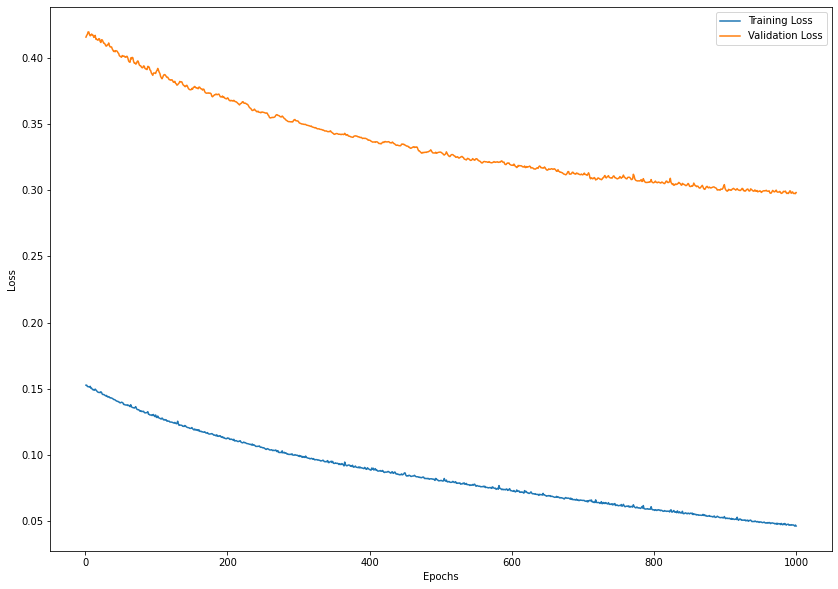

In [45]:
plt.figure(figsize=(14,10))
epochs_range=range(1,epochs+1)
train_loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epochs_range,train_loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the Model

In [44]:
print('Neural Network Accuracy',nn_model.evaluate(x_test,y_test))

2/2 [==============================] - 0s 5ms/step - loss: 0.6459 - accuracy: 0.8542
Neural Network Accuracy [0.6458627581596375, 0.8541666865348816]
